**Importing all necessary Library**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

**Working on DataFrame**

In [3]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [4]:
df = pd.read_csv('train.csv')

In [5]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
numeric_df=df.select_dtypes(include='number')
correlation_matrix= numeric_df.corr()
correlation_matrix['SalePrice'].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [7]:
req_tr=["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd","SalePrice"]

In [8]:
selected_tr=df[req_tr]

In [9]:
selected_tr.loc[:,'TotalBath']=(selected_tr['BsmtFullBath'].fillna(0)+selected_tr['BsmtHalfBath'].fillna(0)+selected_tr['FullBath'].fillna(0)+selected_tr['HalfBath'].fillna(0))
selected_tr.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+selected_tr['1stFlrSF'].fillna(0)+selected_tr['2ndFlrSF'].fillna(0)+selected_tr['LowQualFinSF'].fillna(0))

<ipython-input-9-f698edf073d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:,'TotalBath']=(selected_tr['BsmtFullBath'].fillna(0)+selected_tr['BsmtHalfBath'].fillna(0)+selected_tr['FullBath'].fillna(0)+selected_tr['HalfBath'].fillna(0))
<ipython-input-9-f698edf073d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tr.loc[:,'TotalSF']=(selected_tr['TotalBsmtSF'].fillna(0)+selected_tr['1stFlrSF'].fillna(0)+selected_tr['2ndFlrSF'].fillna(0)+selected_tr['LowQualFinSF'].fillna(0))


In [10]:
selected_tr

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,SalePrice,TotalBath,TotalSF
0,548,7,856,856,854,0,1710,1,0,2,1,8,208500,4,2566
1,460,6,1262,1262,0,0,1262,0,1,2,0,6,181500,3,2524
2,608,7,920,920,866,0,1786,1,0,2,1,6,223500,4,2706
3,642,7,756,961,756,0,1717,1,0,1,0,7,140000,2,2473
4,836,8,1145,1145,1053,0,2198,1,0,2,1,9,250000,4,3343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,460,6,953,953,694,0,1647,0,0,2,1,7,175000,3,2600
1456,500,6,1542,2073,0,0,2073,1,0,2,0,7,210000,3,3615
1457,252,7,1152,1188,1152,0,2340,0,0,2,0,9,266500,2,3492
1458,240,5,1078,1078,0,0,1078,1,0,1,0,5,142125,2,2156


**Keep Necessary Columns**

In [11]:
train_df=selected_tr[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','SalePrice','OverallQual']]

In [12]:
train_df

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,SalePrice,OverallQual
0,8,4,548,2566,208500,7
1,6,3,460,2524,181500,6
2,6,4,608,2706,223500,7
3,7,2,642,2473,140000,7
4,9,4,836,3343,250000,8
...,...,...,...,...,...,...
1455,7,3,460,2600,175000,6
1456,7,3,500,3615,210000,6
1457,9,2,252,3492,266500,7
1458,5,2,240,2156,142125,5


**Splitting the dataset and create pipeline**

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(train_df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 1168
Rows in test set: 292



In [14]:
housing=train_set.drop("SalePrice",axis=1)
housing_labels=train_set["SalePrice"].copy()

In [15]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [16]:
X_train=my_pipeline.fit_transform(housing)

In [17]:
X_train

array([[-0.96456591, -0.48377079, -0.86383727,  0.04719046, -0.82044456],
       [ 0.27075534,  0.61127627, -0.45626397, -0.26638311, -0.08893368],
       [-1.58222654, -1.57881784, -2.25716927, -1.21196543, -0.82044456],
       ...,
       [-0.96456591, -0.48377079,  0.45366713, -1.04667083, -0.82044456],
       [ 0.27075534, -0.48377079, -1.23349678, -0.30527596,  0.64257719],
       [ 0.27075534, -0.48377079,  0.87071888,  0.41181089,  0.64257719]])

In [18]:
Y_train=housing_labels

In [21]:
Y_train.shape

(1168,)

**Correlations**

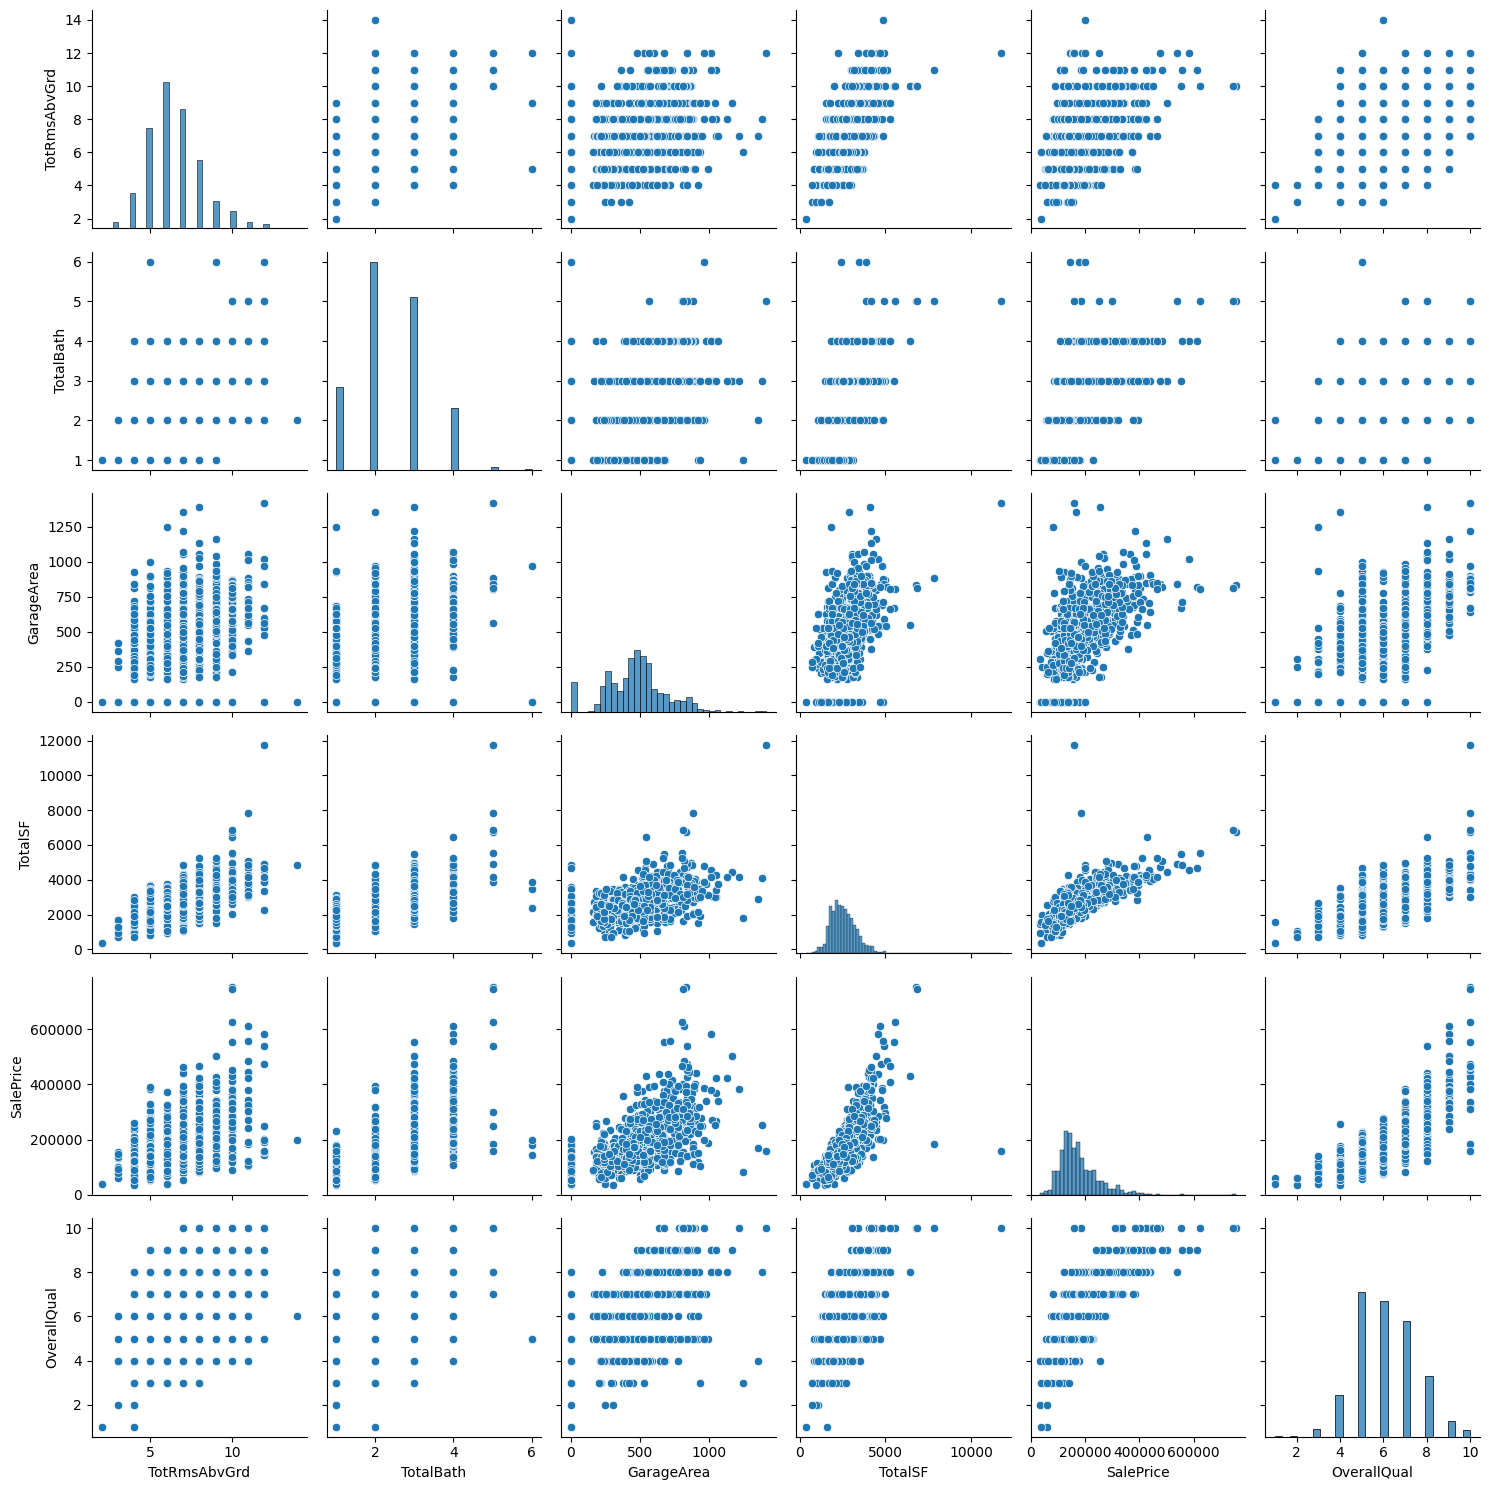

In [22]:
import warnings
warnings.filterwarnings("ignore",category=UserWarning)
%matplotlib inline
sns.pairplot(train_df)
plt.tight_layout()
plt.show()

In [23]:
corr_matrix=train_df.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
TotalSF,0.778959
GarageArea,0.623431
TotalBath,0.613005
TotRmsAbvGrd,0.533723


<Axes: >

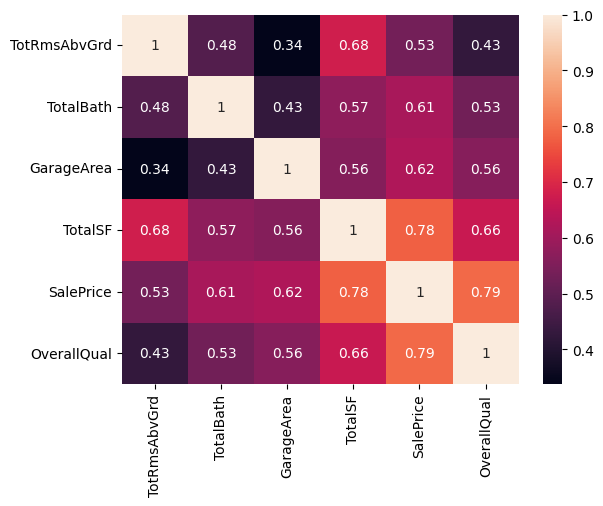

In [24]:
sns.heatmap(train_df.corr(),annot=True)

**Working with Test DataFrame**

In [25]:
from google.colab import files

uploaded = files.upload()

Saving test.csv to test.csv


In [26]:
testdf=pd.read_csv('test.csv')

In [27]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [28]:
req_tst=["GarageArea","OverallQual","TotalBsmtSF","1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","TotRmsAbvGrd"]

In [29]:
selected_tst=testdf[req_tst]

In [30]:
selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
                                    selected_tst['BsmtHalfBath'].fillna(0) +
                                    selected_tst['FullBath'].fillna(0) +
                                    selected_tst['HalfBath'].fillna(0))

selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +
                                  selected_tst['1stFlrSF'].fillna(0) +
                                  selected_tst['2ndFlrSF'].fillna(0) +
                                  selected_tst['LowQualFinSF'].fillna(0) +
                                  selected_tst['GrLivArea'].fillna(0))

<ipython-input-30-88b69dcf1189>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalBath'] = (selected_tst['BsmtFullBath'].fillna(0) +
<ipython-input-30-88b69dcf1189>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_tst.loc[:, 'TotalSF'] = (selected_tst['TotalBsmtSF'].fillna(0) +


In [31]:
selected_tst

,GarageArea,OverallQual,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,TotalBath,TotalSF
0,730.0,5,882.0,896,0,0,896,0.0,0.0,1,0,5,1.0,2674.0
1,312.0,6,1329.0,1329,0,0,1329,0.0,0.0,1,1,6,2.0,3987.0
2,482.0,5,928.0,928,701,0,1629,0.0,0.0,2,1,6,3.0,4186.0
3,470.0,6,926.0,926,678,0,1604,0.0,0.0,2,1,7,3.0,4134.0
4,506.0,8,1280.0,1280,0,0,1280,0.0,0.0,2,0,5,2.0,3840.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,5,2.0,2730.0
1455,286.0,4,546.0,546,546,0,1092,0.0,0.0,1,1,6,2.0,2730.0
1456,576.0,5,1224.0,1224,0,0,1224,1.0,0.0,1,0,7,2.0,3672.0
1457,0.0,5,912.0,970,0,0,970,0.0,1.0,1,0,6,2.0,2852.0


In [32]:
test_df_unproc=selected_tst[["TotRmsAbvGrd","TotalBath","GarageArea","TotalSF","OverallQual"]]

In [33]:
test_df_unproc

,TotRmsAbvGrd,TotalBath,GarageArea,TotalSF,OverallQual
0,5,1.0,730.0,2674.0,5
1,6,2.0,312.0,3987.0,6
2,6,3.0,482.0,4186.0,5
3,7,3.0,470.0,4134.0,6
4,5,2.0,506.0,3840.0,8
...,...,...,...,...,...
1454,5,2.0,0.0,2730.0,4
1455,6,2.0,286.0,2730.0,4
1456,7,2.0,576.0,3672.0,5
1457,6,2.0,0.0,2852.0,5


In [34]:
test_df=test_df_unproc.fillna(test_df_unproc.mean())

In [36]:
x_test=my_pipeline.transform(test_df[['TotRmsAbvGrd','TotalBath','GarageArea','TotalSF','OverallQual']].values)

In [37]:
x_test

array([[-0.96456591, -1.57881784,  1.2024646 ,  0.10309892, -0.82044456],
       [-0.34690528, -0.48377079, -0.77853123,  1.698921  , -0.08893368],
       [-0.34690528,  0.61127627,  0.02713693,  1.94078589, -0.82044456],
       ...,
       [ 0.27075534, -0.48377079,  0.47262403,  1.31606955, -0.82044456],
       [-0.34690528, -0.48377079, -2.25716927,  0.31944038, -0.82044456],
       [ 1.50607659,  0.61127627,  0.82332664,  2.92526105,  0.64257719]])

**Model Selection**

In [38]:
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(X_train,Y_train)

RandomForestRegressor()

In [39]:
y_train_pred=model.predict(X_train)

In [40]:
y_train_pred[:5]

array([146642.  , 171145.  ,  90038.  , 162317.74, 142076.  ])

In [41]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]

In [42]:
proc_data=my_pipeline.transform(some_data)

In [43]:
model.predict(proc_data)

array([146642.  , 171145.  ,  90038.  , 162317.74, 142076.  ])

In [44]:
list(some_labels)

[145000, 178000, 85000, 175000, 127000]

In [45]:
train_mse=mean_squared_error(Y_train,y_train_pred)

In [46]:
train_rmse=np.sqrt(train_mse)

In [47]:
print(f"Training MSE: {train_mse:.2f}, Training RMSE: {train_rmse:.2f}")

Training MSE: 165737883.35, Training RMSE: 12873.92


**Cross Validation**

In [49]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error",cv=200)
rmse_scores=np.sqrt(-scores)

In [50]:
rmse_scores

array([ 23695.11978693,  15121.74736348,  22563.3459185 ,  14993.03514523,
        48004.77504617,  14336.5566681 ,  22144.70697875,  11777.7260271 ,
        15031.87773413,  45138.92167657,  30452.4211247 ,  32987.84780703,
        11172.32622475,  11055.84096196,  24218.12135946,  17370.64822577,
        19716.62944251,  29282.62503409,  27610.48352363,  17489.76579362,
        22497.33014218,  15792.47084061,  18973.19615822,  26011.47698453,
        28668.78812616,  21523.76994699,  46139.87043673,  26054.87133551,
       113882.20137619,  43153.95298948,  15445.95772159,  23796.8623683 ,
        27824.60900173,  30769.35550336,  53867.66789953,  19909.56367827,
        18337.32323654,  23621.08067652,  13836.24738877,  17340.39398151,
        31530.16710281,  46837.83889347,  26540.22911759,  51269.02956579,
        37256.07826426,  24205.48359418,  26265.91532263,  38465.7918823 ,
        25239.37577931,  23891.72899145,  17185.72347246,  54409.56099326,
        36417.64582488,  

In [51]:
def print_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard Deviation:",scores.std())

In [52]:
print_scores(rmse_scores)

Scores: [ 23695.11978693  15121.74736348  22563.3459185   14993.03514523
  48004.77504617  14336.5566681   22144.70697875  11777.7260271
  15031.87773413  45138.92167657  30452.4211247   32987.84780703
  11172.32622475  11055.84096196  24218.12135946  17370.64822577
  19716.62944251  29282.62503409  27610.48352363  17489.76579362
  22497.33014218  15792.47084061  18973.19615822  26011.47698453
  28668.78812616  21523.76994699  46139.87043673  26054.87133551
 113882.20137619  43153.95298948  15445.95772159  23796.8623683
  27824.60900173  30769.35550336  53867.66789953  19909.56367827
  18337.32323654  23621.08067652  13836.24738877  17340.39398151
  31530.16710281  46837.83889347  26540.22911759  51269.02956579
  37256.07826426  24205.48359418  26265.91532263  38465.7918823
  25239.37577931  23891.72899145  17185.72347246  54409.56099326
  36417.64582488  31689.51438418  21146.23928051  28534.62244717
  20289.39565566  30706.09676998  21256.93313702  32135.24223813
 200547.18151387  16

In [53]:
y_pred=model.predict(x_test)

In [54]:
y_pred

array([103883.  , 214160.7 , 169420.05, ..., 158534.15, 140287.5 ,
       258974.4 ])

In [56]:
from google.colab import files

uploaded = files.upload()

Saving sample_submission.csv to sample_submission.csv


In [57]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)